In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
milk = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\milk.csv",index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [3]:
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(milk)
milkscaled = scaler.transform(milk)

In [4]:
pca = PCA().set_output(transform ='pandas')
principalComponents = pca.fit_transform(milk)

In [5]:
principalComponents.corr()

,pca0,pca1,pca2,pca3,pca4
pca0,1.000000e+00,4.325767e-17,-1.606522e-16,3.187461e-17,-1.354389e-16
pca1,4.325767e-17,1.000000e+00,-5.913705e-17,7.626603e-17,-1.869595e-17
pca2,-1.606522e-16,-5.913705e-17,1.000000e+00,-5.185473e-16,9.720739e-17
pca3,3.187461e-17,7.626603e-17,-5.185473e-16,1.000000e+00,-1.607223e-16
pca4,-1.354389e-16,-1.869595e-17,9.720739e-17,-1.607223e-16,1.000000e+00


In [6]:
principalComponents.var()

pca0    282.167328
pca1      8.134316
pca2      1.203587
pca3      0.305746
pca4      0.067737
dtype: float64

In [7]:
values , vectors = np.linalg.eig(milkscaled.cov())

print(pca.explained_variance_)
tot_var = np.sum(pca.explained_variance_)
print(np.sum(pca.explained_variance_))
print(pca.explained_variance_/tot_var)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_ * 100)
print(np.cumsum(pca.explained_variance_))

[2.82167328e+02 8.13431563e+00 1.20358727e+00 3.05746432e-01
 6.77367465e-02]
291.8787143333331
[9.66728009e-01 2.78688210e-02 4.12358699e-03 1.04751192e-03
 2.32071553e-04]
[9.66728009e-01 2.78688210e-02 4.12358699e-03 1.04751192e-03
 2.32071553e-04]
[9.66728009e+01 2.78688210e+00 4.12358699e-01 1.04751192e-01
 2.32071553e-02]
[282.16732826 290.30164389 291.50523116 291.81097759 291.87871433]


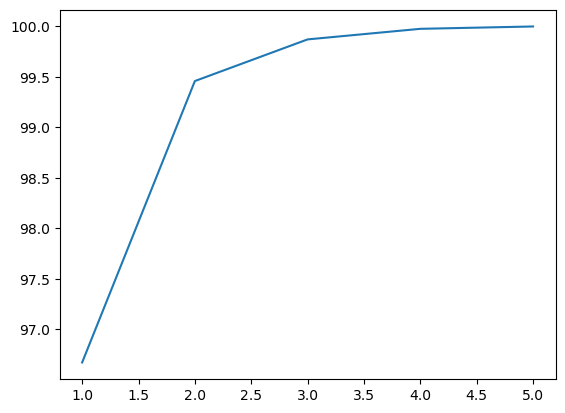

In [8]:

ys = np.cumsum(pca.explained_variance_ratio_ * 100)
xs = np.arange(1,6)
plt.plot(xs,ys)
plt.show()

In [9]:
iris = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\iris.csv")
iris.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

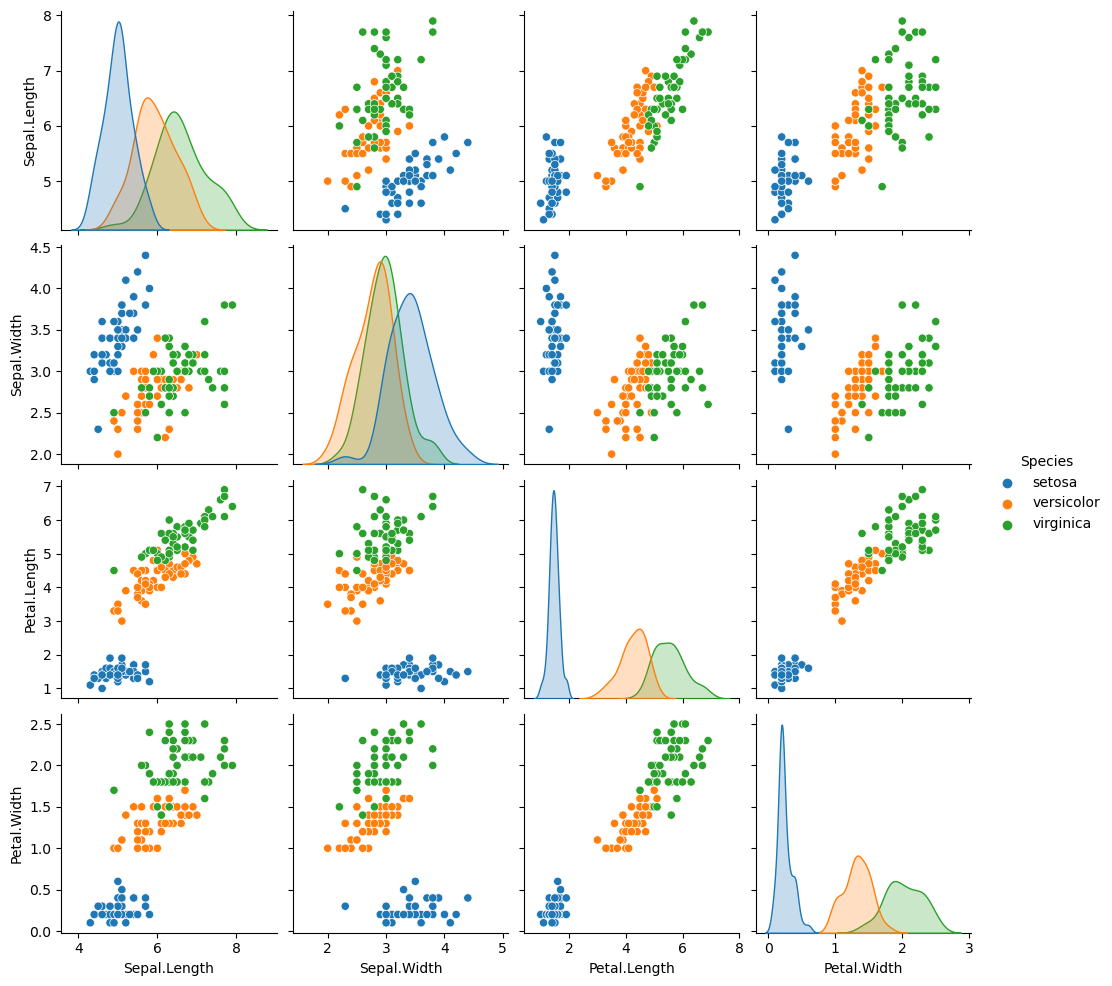

In [10]:
sns.pairplot(iris, hue='Species')
plt.show()

In [11]:
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(iris.drop('Species',axis=1))
iris_scaled = scaler.transform(iris.drop('Species',axis=1))

In [12]:
pca = PCA().set_output(transform ='pandas')
p_Comp = pca.fit_transform(iris_scaled)

In [13]:


p_Comp.corr()

,pca0,pca1,pca2,pca3
pca0,1.000000e+00,7.312994e-17,-7.803495e-17,-1.061103e-16
pca1,7.312994e-17,1.000000e+00,5.273220e-18,-8.677767e-17
pca2,-7.803495e-17,5.273220e-18,1.000000e+00,-2.919700e-16
pca3,-1.061103e-16,-8.677767e-17,-2.919700e-16,1.000000e+00


In [14]:
p_Comp.var()

pca0    2.938085
pca1    0.920165
pca2    0.147742
pca3    0.020854
dtype: float64

In [15]:
print(pca.explained_variance_)
tot_var = np.sum(pca.explained_variance_)
print(np.sum(pca.explained_variance_))
print(pca.explained_variance_/tot_var)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_ * 100)
print(np.cumsum(pca.explained_variance_ratio_ * 100))

[2.93808505 0.9201649  0.14774182 0.02085386]
4.026845637583892
[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.22850762 0.03668922 0.00517871]
[72.96244541 22.85076179  3.66892189  0.51787091]
[ 72.96244541  95.8132072   99.48212909 100.        ]


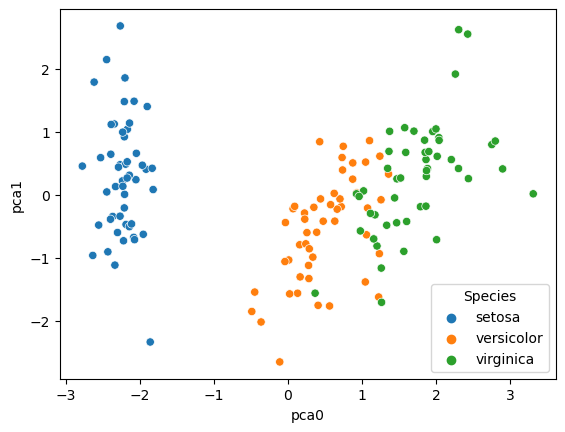

In [16]:
p_Comp['Species'] = iris['Species']
sns.scatterplot(data= p_Comp,x='pca0',y='pca1',hue='Species')
plt.show()

In [17]:
from pca import pca
model = pca()
results = model.fit_transform(milkscaled,
                              col_labels=milk.columns,
                              row_labels=list(milk.index))


[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


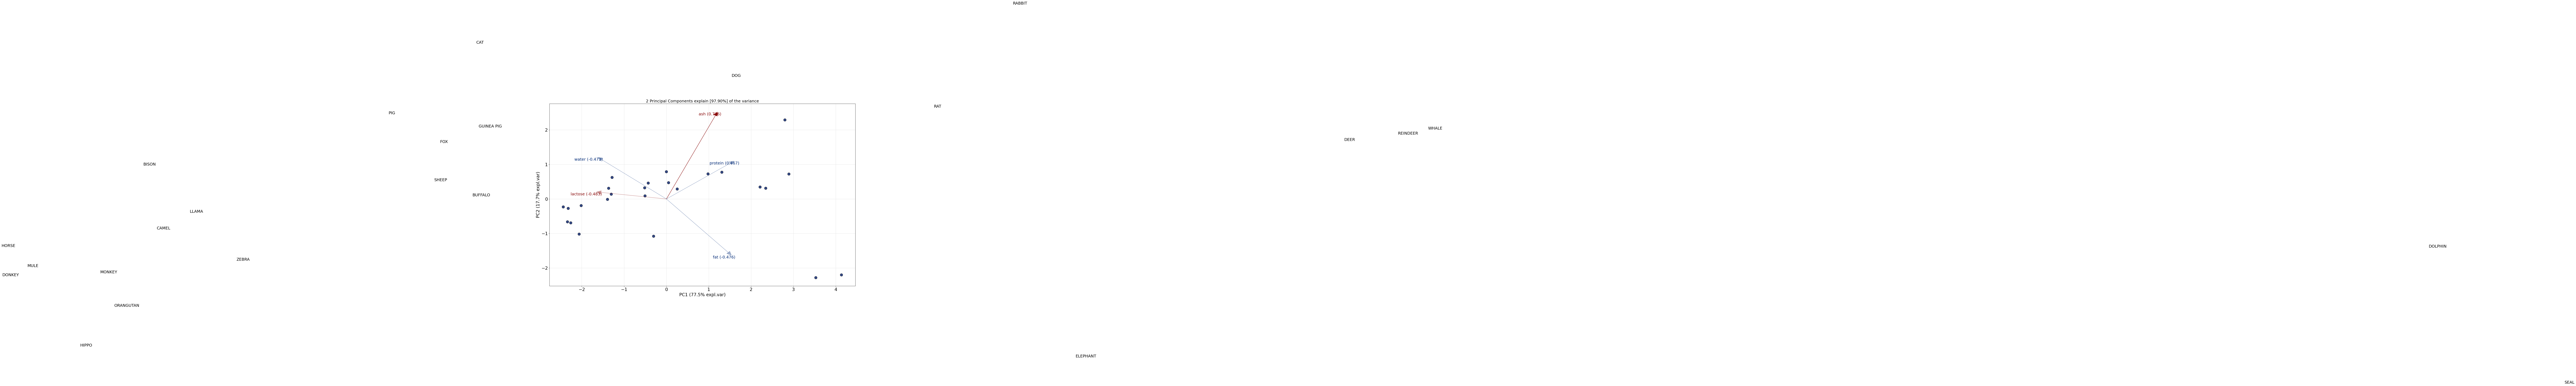

In [18]:
model.biplot(label=True,legend=True)
for i in np.arange(0,milk.shape[0]):
    plt.text(principalComponents.values[i,0],
             principalComponents.values[i,1],
             list(milk.index)[i])
plt.show()